In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
import warnings

# Suppress warnings for better output readability
warnings.filterwarnings("ignore")

In [37]:
# Load the Excel data
data = pd.read_excel(r"C:\Users\alexm\Desktop\Dissaster Types\Flood.xlsx")

# Step 1: Initial Data Exploration


# Step 2: Handling Missing Values

# Fill missing values in date columns
data['Start Month'] = data['Start Month'].fillna(1).astype(int)  # Default to January
data['Start Day'] = data['Start Day'].fillna(1).astype(int)  # Default to 1st day
data['Start Year'] = data['Start Year'].fillna(2000).astype(int)  # Default to year 2000
data['End Year'] = data['End Year'].fillna(data['Start Year']).astype(int)  # Use Start Year if End Year is missing
data['End Month'] = data['End Month'].fillna(12).astype(int)  # Default to December
data['End Day'] = data['End Day'].fillna(31).astype(int)  # Default to 31st day

# Handle missing values in numeric columns
#numeric_cols = data.select_dtypes(include=np.number).columns
#for col in numeric_cols:
 #   mean_value = data[col].mean()
 #   data[col] = data[col].fillna(mean_value)  # Fill with mean value

# Handle missing values in categorical columns
object_cols = data.select_dtypes(include='object').columns
for col in object_cols:
    if data[col].isnull().any():
        mode_value = data[col].mode()[0]
        data[col] = data[col].fillna(mode_value)  # Replace NaN with mode

# Step 3: Drop Columns That Are Not Needed
# dropping certain columns
import pandas as pd




# Define the updated columns to drop
columns_to_drop = ['Classification Key','Location','OFDA Response', 'Appeal', 'Start Day', 'End Year', 'End Month', 'End Day'
       'Declaration', 'Historic', 'Disaster Group', 'Country', 'Subregion', 'Region','End Day',"Declaration"
    , 'Disaster Subgroup', 'Last Update', 'Entry Date','Latitude', 'Longitude',"Admin Units" ,"External IDs" ,"Event Name","Origin",
    " External IDs", "Magnitude Scale","No. Affected","No. Injured" , "Total Deaths ","Reconstruction Costs, Adjusted ('000 US$)","Insured Damage, Adjusted ('000 US$)"
,"Total Damage, Adjusted ('000 US$)" ,"No. Homeless","Disaster Type","ISO","DisNo."]

# Drop the columns, ignoring errors for non-existent columns
data = data.drop(columns=columns_to_drop, errors='ignore')

# Columns with missing values to fill with 0

columns_with_missing_values = [
    "Reconstruction Costs ('000 US$)", "Total Deaths" ,  "Insured Damage ('000 US$)",  "Total Damage ('000 US$)", 
       "Total Affected",  "AID Contribution ('000 US$)"]

# Fill missing values in the specified columns with 0
data[columns_with_missing_values] = data[columns_with_missing_values].fillna(0)

# Rename the column "Magnitude" to "Magnitude(Scale km2)"
data.rename(columns={"Magnitude": "Magnitude(Scale )"}, inplace=True)


In [38]:
# Columns to convert
columns_to_convert = [
    "Reconstruction Costs ('000 US$)", 
    "Reconstruction Costs, Adjusted ('000 US$)", 
    "Insured Damage ('000 US$)", 
    "Insured Damage, Adjusted ('000 US$)", 
    "Total Damage ('000 US$)", 
    "Total Damage, Adjusted ('000 US$)"
]

# Iterate over the columns and replace their values with those converted to billions
for column in columns_to_convert:
    if column in data.columns:
        data[column] = data[column] / 1e6
        data.rename(columns={column: column.replace("('000 US$)", "(billion $)")}, inplace=True)

# Verify the replacement
#print(data.head())

In [39]:
import pandas as pd

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to non-numeric columns
data = pd.get_dummies(data, columns=non_numeric_columns, drop_first=True)

# Verify the transformation
print(f"Number of columns after one-hot encoding: {len(data.columns)}")
print("Sample of the transformed DataFrame:")
#print(data.head())

Number of columns after one-hot encoding: 225
Sample of the transformed DataFrame:


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 29 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   AID Contribution ('000 US$)                                           473 non-null    float64
 1   Magnitude                                                             158 non-null    float64
 2   Start Year                                                            473 non-null    int64  
 3   Start Month                                                           473 non-null    int64  
 4   Total Deaths                                                          473 non-null    float64
 5   Total Affected                                                        473 non-null    float64
 6   Reconstruction Costs (billion $)                                      473 non-nu

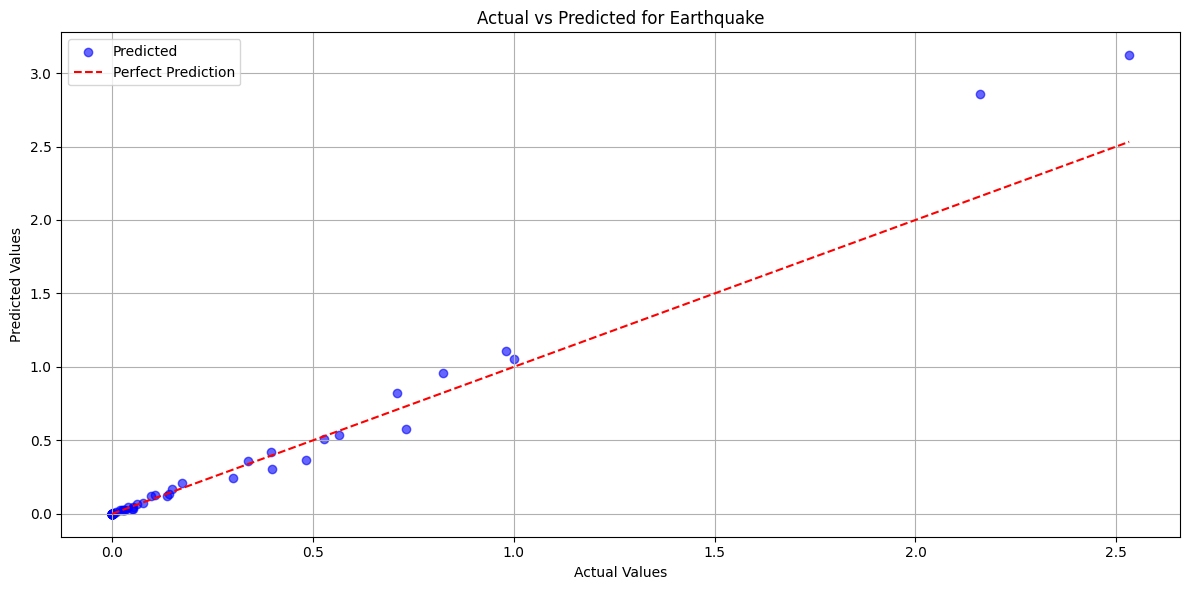

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
import warnings

# Suppress warnings for better output readability
warnings.filterwarnings("ignore")

#Random Forest
data = pd.read_excel(r"C:\Users\alexm\Desktop\Dissaster Types\Flood.xlsx")

# --------------------------------
# Fill missing values in date columns
data['Start Month'] = data['Start Month'].fillna(1).astype(int)  
data['Start Day'] = data['Start Day'].fillna(1).astype(int)  
data['Start Year'] = data['Start Year'].fillna(2000).astype(int)  
data['End Year'] = data['End Year'].fillna(data['Start Year']).astype(int)
data['End Month'] = data['End Month'].fillna(12).astype(int)
data['End Day'] = data['End Day'].fillna(31).astype(int)

# Handle missing values in object columns by filling with mode
object_cols = data.select_dtypes(include='object').columns
for col in object_cols:
    if data[col].isnull().any():
        mode_value = data[col].mode()[0]
        data[col] = data[col].fillna(mode_value)

# --------------------------------
# Step 3: Drop Columns That Are Not Needed
# --------------------------------
columns_to_drop = [
    'Classification Key','Location','OFDA Response','Appeal','Start Day','End Year','End Month','End Day' 
    'Declaration','Historic','Disaster Group','Country','Subregion','Region','End Day','Declaration',
    'River Basin','Disaster Subgroup','Last Update','Entry Date','Latitude','Longitude','Admin Units',
    'External IDs','Event Name','Origin',' External IDs','Magnitude Scale','No. Affected','No. Injured',
    'Total Deaths ','Reconstruction Costs, Adjusted (\'000 US$)','Insured Damage, Adjusted (\'000 US$)',
    'No. Homeless','Disaster Type','ISO','DisNo.'
]

data = data.drop(columns=columns_to_drop, errors='ignore')

# --------------------------------
# Step 4: Fill NA with 0 for Certain Columns
# --------------------------------
columns_with_missing_values = [
    "Reconstruction Costs ('000 US$)", 
    "Total Deaths", "Total Damage, Adjusted ('000 US$)", 
    "Insured Damage ('000 US$)",  
    "Total Damage ('000 US$)",
    "Total Affected",  
    "AID Contribution ('000 US$)"
]
for col in columns_with_missing_values:
    if col in data.columns:
        data[col] = data[col].fillna(0)

# --------------------------------
# Step 5: Convert '000 US$ columns to (billion $)
# --------------------------------
columns_to_convert = [
    "Reconstruction Costs ('000 US$)", 
    "Reconstruction Costs, Adjusted ('000 US$)", 
    "Insured Damage ('000 US$)", 
    "Insured Damage, Adjusted ('000 US$)", 
    "Total Damage ('000 US$)", 
    "Total Damage, Adjusted ('000 US$)"
]

for column in columns_to_convert:
    if column in data.columns:
        # Convert from '000 US$ to billion $
        data[column] = data[column] / 1e6  
        new_col = column.replace("('000 US$)", "(billion $)")
        data.rename(columns={column: new_col}, inplace=True)

# At this point, you should have "Total Damage (billion $)" in your DataFrame

# --------------------------------
# Step 6: One-Hot Encoding for Non-Numeric Columns
# --------------------------------
non_numeric_columns = data.select_dtypes(include=['object', 'category']).columns
data = pd.get_dummies(data, columns=non_numeric_columns, drop_first=True)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming the earthquake dataset is loaded into `data`
print("Dataset Overview:")
print(data.info())

# Define the target variable and features
target_column = "Total Damage, Adjusted (billion $)"
X = data.drop(columns=[target_column])
y = data[target_column]

# Confirm all features are numeric
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Proceed if sufficient data is available
if len(X) > 1:
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=10, random_state=30)
    rf_model.fit(X_train, y_train)

    # Predict and calculate RMSE
    y_pred = rf_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE for Wildfire: {rmse:.2f}")

    # Plot actual vs predicted values
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
    plt.title("Actual vs Predicted for Earthquake")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print(f"Skipped analysis due to insufficient samples (n={len(X)})")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002164FC61B40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Cross-Validation RMSE Scores: [np.float64(0.38

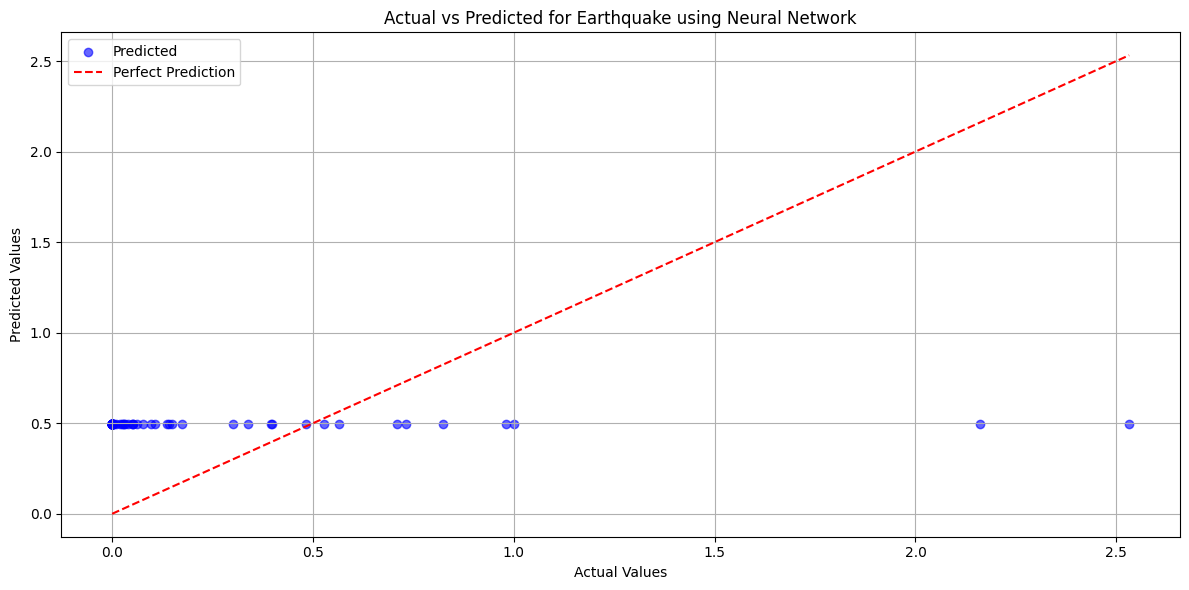

Feature Importance:
                                              Feature    Importance
8                            Total Damage (billion $)  6.868829e-01
4                                        Total Deaths  1.517420e-01
7                          Insured Damage (billion $)  1.084432e-01
9                                                 CPI  2.193095e-02
2                                          Start Year  7.360554e-03
1                                           Magnitude  5.327223e-03
5                                      Total Affected  5.090177e-03
21                              Associated Types_Rain  3.446610e-03
10                       Disaster Subtype_Flash flood  2.853040e-03
23     Associated Types_Slide (land, mud, snow, rock)  2.582730e-03
12                    Disaster Subtype_Riverine flood  2.336581e-03
3                                         Start Month  1.372729e-03
11                   Disaster Subtype_Flood (General)  4.347617e-04
0                         AI

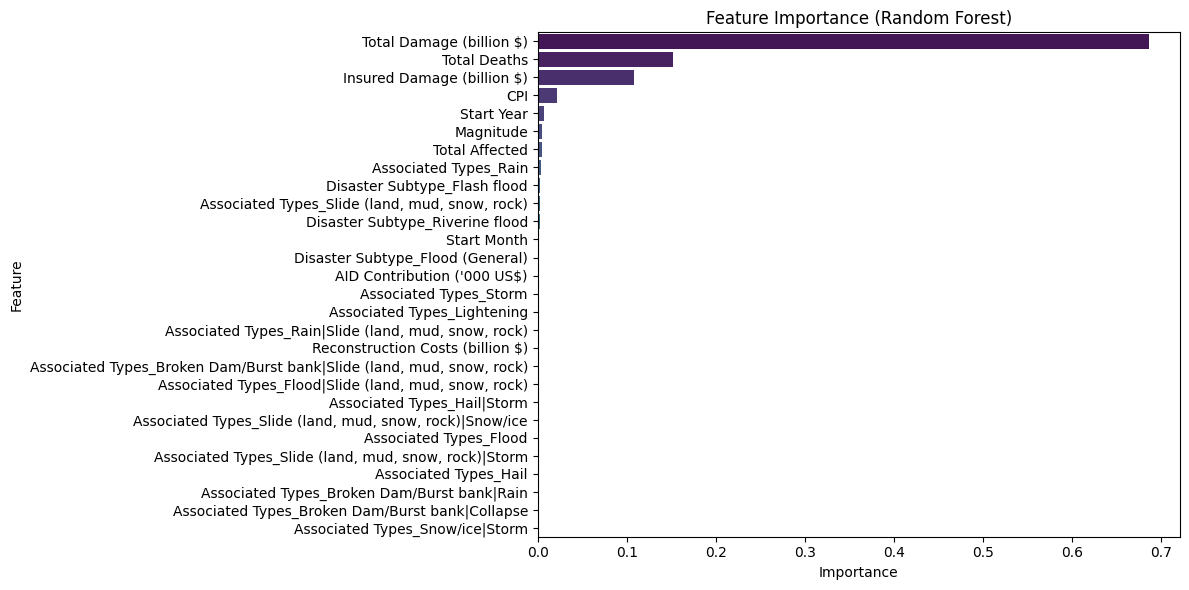

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score


# Step 2: Define Features and Target Variable

X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target

# Step 3: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Cross-Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse_scores = []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Step 5: Build Neural Network Model
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),  # Input layer
        layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons
        layers.Dropout(0.2),  # Regularization
        layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons
        layers.Dense(1)  # Output layer
    ])

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

    # Train the model with Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Evaluate the model
    y_val_pred = model.predict(X_val).flatten()
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    cv_rmse_scores.append(val_rmse)

# Calculate and print CV results
print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Average CV RMSE: {np.mean(cv_rmse_scores):.2f}")

# Step 6: Train Final Model on Entire Training Set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    layers.Dropout(0.2),  # Regularization
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    layers.Dense(1)  # Output layer
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=1, callbacks=[early_stopping])

# Step 7: Evaluate the Final Model
y_pred = model.predict(X_test).flatten()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"Final Model RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# Step 8: Visualize Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Actual vs Predicted for Earthquake using Neural Network")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 9: Analyze Feature Importance using Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Extract feature importance
feature_importance = pd.DataFrame({'Feature': data.drop(columns=[target_column]).columns, 
                                   'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

# Step 10: Cross-Validation with Random Forest
cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
avg_rmse_rf = np.sqrt(-np.mean(cv_scores_rf))
print(f"Cross-Validated RMSE (Random Forest): {avg_rmse_rf:.2f}")

# Step 11: Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

RMSE: 0.19, MAE: 0.13


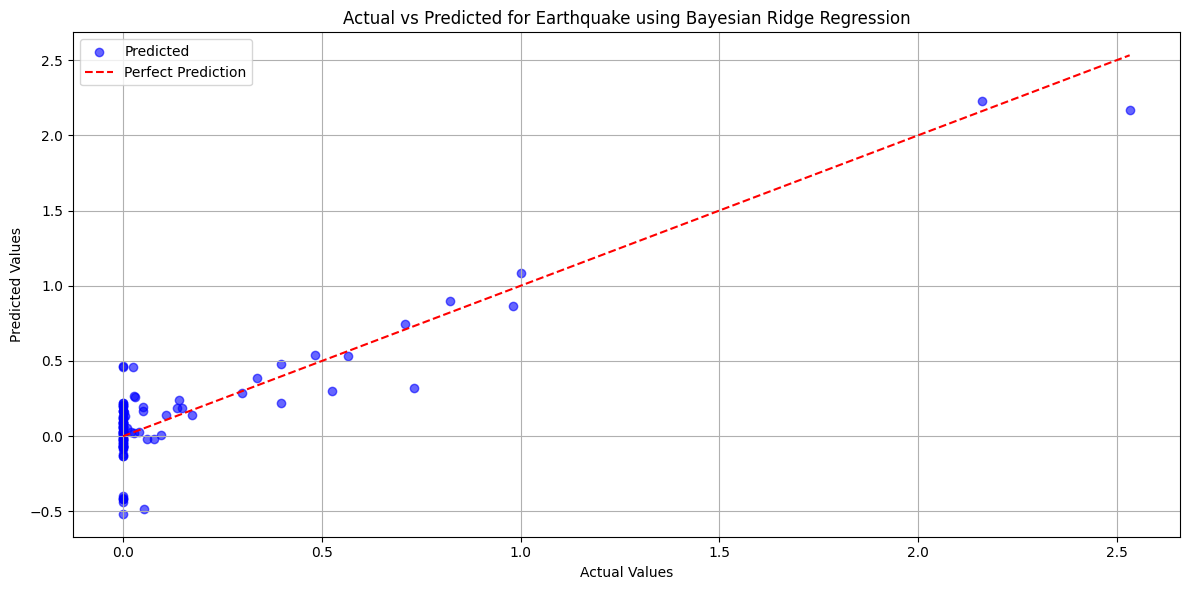

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import BayesianRidge






# Ensure target variable is numeric
data[target_column] = pd.to_numeric(data[target_column], errors='coerce')

# Drop rows with NaN target values
data = data.dropna(subset=[target_column])

# Define features (X) and target (y)
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target

# Ensure all features are numeric (already hot-encoded)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Step 3: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and Train Bayesian Ridge Regression Model
model = BayesianRidge()
model.fit(X_train, y_train)

# Step 5: Make Predictions and Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# Step 6: Visualize Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Actual vs Predicted for Earthquake using Bayesian Ridge Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 29 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   AID Contribution ('000 US$)                                           473 non-null    float64
 1   Magnitude                                                             158 non-null    float64
 2   Start Year                                                            473 non-null    int64  
 3   Start Month                                                           473 non-null    int64  
 4   Total Deaths                                                          473 non-null    float64
 5   Total Affected                                                        473 non-null    float64
 6   Reconstruction Costs (billion $)                                      473 non-nu

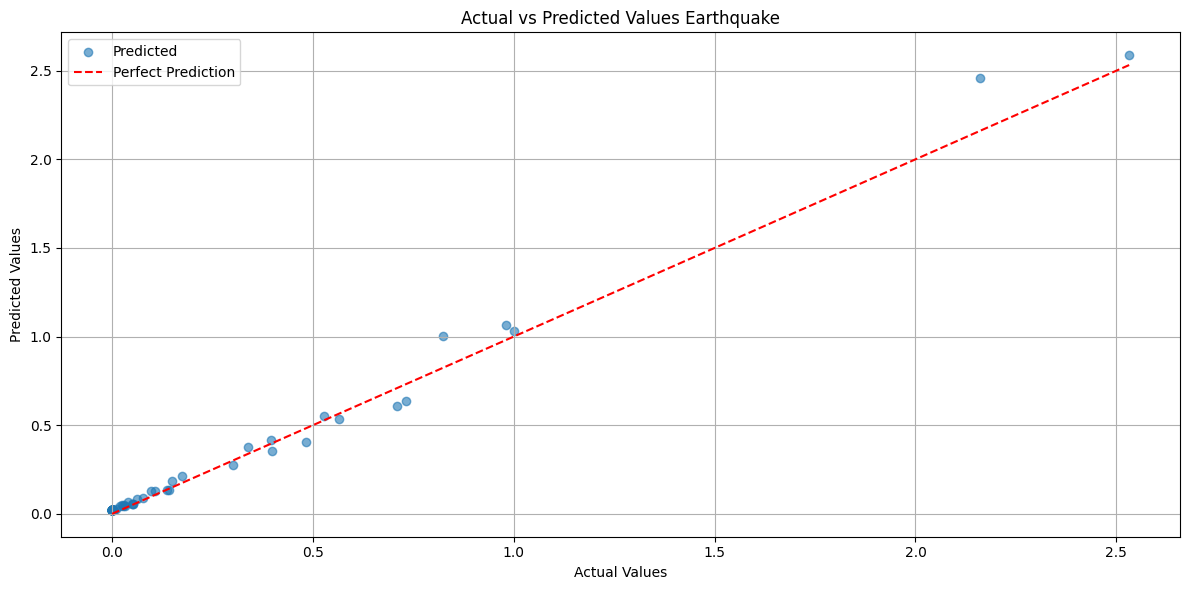


Model Evaluation Summary:
                     Model   CV RMSE  Test RMSE
0  Gradient Boosting (XGB)  1.364204   0.046519


In [6]:
###Gradient Boosting Model

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load and validate dataset
print("Dataset Overview:")
print(data.info())

# Define the target variable and features

X = data.drop(columns=[target_column])
y = data[target_column]

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
gbm_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=30,
    learning_rate=0.1,
    random_state=42,
    tree_method='auto'  # Use an appropriate tree method
)

# Custom Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

print("\nPerforming Cross-Validation...")
for train_index, val_index in kf.split(X_train):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    gbm_model.fit(X_train_cv, y_train_cv)
    preds = gbm_model.predict(X_val_cv)
    cv_rmse = np.sqrt(mean_squared_error(y_val_cv, preds))
    cv_scores.append(cv_rmse)

avg_cv_rmse = np.mean(cv_scores)
print(f"Average CV RMSE: {avg_cv_rmse:.2f}")

# Train on the full training set and evaluate on the test set
print("\nTraining on full training set...")
gbm_model.fit(X_train, y_train)
test_preds = gbm_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print(f"Test RMSE: {test_rmse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, test_preds, alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Actual vs Predicted Values Earthquake")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save results for summary
results = {
    'Model': ['Gradient Boosting (XGB)'],
    'CV RMSE': [avg_cv_rmse],
    'Test RMSE': [test_rmse]
}

results_df = pd.DataFrame(results)
print("\nModel Evaluation Summary:")
print(results_df)

In [16]:
def process_sarima_with_rmse(data):
    """Fits a SARIMA model, forecasts, and calculates RMSE."""
    print("Starting SARIMA processing...")

    # Combine 'Start Year' and 'Start Month' into a single datetime column
    if 'Start Year' in data.columns and 'Start Month' in data.columns:
        print("Creating 'Start Date' column from 'Start Year' and 'Start Month'...")
        data['Start Date'] = pd.to_datetime(data['Start Year'].astype(str) + '-' + data['Start Month'].astype(str) + '-01')
        data.set_index('Start Date', inplace=True)
    else:
        print("Missing 'Start Year' and 'Start Month' columns.")
        return

    # Check for duplicate index labels
    if data.index.duplicated().any():
        print("Duplicate index labels detected. Dropping duplicates...")
        data = data.loc[~data.index.duplicated()]

    # Ensure no missing data in 'Total Damage (billion $)'
    print("Filling missing values in 'Total Damage (billion $)'...")
    data['Total Damage (billion $)'] = data['Total Damage (billion $)'].fillna(method='ffill')

    # Ensure sufficient data points
    if len(data) < 24:
        print("Insufficient data points. Exiting SARIMA processing.")
        return

    # Split data into training and test sets
    train_data = data.iloc[:-12]  # Use all except the last 12 months for training
    test_data = data.iloc[-12:]  # Use the last 12 months for testing

    # Check stationarity
    print("Checking stationarity...")
    is_stationary = check_stationarity(train_data['Total Damage (billion $)'])
    if not is_stationary:
        print("Data is not stationary. Applying differencing...")
        train_data['Total Damage (billion $)'] = train_data['Total Damage (billion $)'].diff().dropna()
        test_data['Total Damage (billion $)'] = test_data['Total Damage (billion $)'].diff().dropna()

    # Apply log transformation
    print("Applying log transformation...")
    train_data['Log Total Damage'] = np.log(train_data['Total Damage (billion $)'].replace(0, np.nan)).dropna()

    try:
        # Fit SARIMA model
        print("Fitting SARIMA model...")
        model = SARIMAX(
            train_data['Log Total Damage'],
            order=(1, 1, 1),
            seasonal_order=(1, 1, 1, 12),
            enforce_stationarity=False,
            enforce_invertibility=False,
        )
        model_fit = model.fit(disp=False)

        # Forecast for the test period
        forecast_log = model_fit.forecast(steps=12)
        forecast = np.exp(forecast_log).apply(lambda x: max(0, x))  # Ensure non-negative values

        # Calculate RMSE
        actual_values = test_data['Total Damage (billion $)'].values
        predicted_values = forecast.values
        rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
        print(f"RMSE: {rmse:.2f}")

        # Combine historical and forecast data for a continuous plot
        combined_data = pd.concat([data['Total Damage (billion $)'], forecast], keys=['Historical', 'Forecast'])

        # Plotting
        print("Plotting results...")
        plt.figure(figsize=(12, 6))
        plt.plot(data.index, data['Total Damage (billion $)'], label='Historical Data', color='blue')
        forecast_dates = pd.date_range(start=data.index[-1], periods=12, freq='M')
        plt.plot(forecast_dates, forecast.values, label='Forecast', color='red', linestyle='--')
        plt.axvline(data.index[-13], color='gray', linestyle='--', label='Forecast Start')
        plt.title('SARIMA Model Forecast with RMSE')
        plt.xlabel('Year')
        plt.ylabel('Total Damage (Billion $)')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error fitting SARIMA model: {e}")




In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Load the dataset
file_path = r"C:\Users\alexm\Downloads\public_emdat_custom_request_2024-02-06_76c28104-4313-4037-8460-6a6bfd8369a1.xlsx"
data = pd.read_excel(file_path)

# Debug: Check initial columns
print("Initial columns in the dataset:")
print(data.columns)

# Define the updated columns to drop
columns_to_drop = [
    'Classification Key', 'Location', 'OFDA Response', 'Appeal', 'End Year', 'End Month', 'End Day',
    'Declaration', 'Historic', 'Disaster Group', 'Disaster Subgroup', 'Last Update', 'Entry Date',
    'Latitude', 'Longitude', 'Admin Units', 'External IDs', 'Event Name', 'Origin',
    'External IDs', 'Magnitude Scale', 
    'Reconstruction Costs, Adjusted (\'000 US$)', 'Insured Damage, Adjusted (\'000 US$)',
      'DisNo.'
]

# Drop the columns, ignoring errors for non-existent columns
data = data.drop(columns=columns_to_drop, errors='ignore')

# Debug: Check columns after dropping
print("Columns after dropping specified columns:")
print(data.columns)

# Columns to convert
columns_to_convert = [
    "Reconstruction Costs ('000 US$)", 
    "Reconstruction Costs, Adjusted ('000 US$)", 
    "Insured Damage ('000 US$)", 
    "Insured Damage, Adjusted ('000 US$)", 
    "Total Damage ('000 US$)", 
    "Total Damage, Adjusted ('000 US$)"
]

# Iterate over the columns and replace their values with those converted to billions
for column in columns_to_convert:
    if column in data.columns:
        data[column] = data[column] / 1e6
        data.rename(columns={column: column.replace("('000 US$)", "(billion $)")}, inplace=True)

# Debug: Check columns after renaming
print("Columns after renaming to billion $:")
print(data.columns)

# Define target variable and features
target_column = "Total Damage, Adjusted (billion $)"

# Check if the target column exists
if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' does not exist! Available columns: {data.columns}")

# Drop rows where the target is NaN
data = data.dropna(subset=[target_column])

# Debug: Check rows remaining
print(f"Rows remaining after dropping NaN in '{target_column}': {len(data)}")

# Select relevant features
selected_features = ['No. Homeless', 'Subregion', 'Disaster Type']
if not all(col in data.columns for col in selected_features):
    raise KeyError(f"Some selected features are missing! Available columns: {data.columns}")

data = data[selected_features + [target_column]]

# Encode categorical features
label_encoders = {}
for col in ['Subregion', 'Disaster Type']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col].astype(str))

# Separate features and target
X = data.drop(columns=[target_column])
y = data[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Debug: Check training set size
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

# Ensure there are no NaN values in the feature matrix
X_train = X_train.fillna(0)  # Replace NaN with 0 
X_test = X_test.fillna(0)

# Manually determine ARIMA parameters
arima_order = (2, 0, 2)  # Placeholder for ARIMA order, can be adjusted based on exploratory analysis

# Train ARIMA model with specified parameters
arima_model_fitted = ARIMA(y_train, order=arima_order).fit()
arima_forecast_train = arima_model_fitted.fittedvalues  # Fitted values for training data
arima_forecast_test = arima_model_fitted.forecast(steps=len(y_test))  # Forecast for test data

# Add ARIMA predictions as a feature
X_train['ARIMA_Forecast'] = arima_forecast_train
X_test['ARIMA_Forecast'] = arima_forecast_test

# Ensure there are no NaN values in the feature matrix after adding ARIMA forecasts
X_train = X_train.fillna(0)  # Replace NaN with 0 (alternative strategies can include mean or median)
X_test = X_test.fillna(0)

# Initialize models
gbm = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
nn = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# Train the models
nn.fit(X_train, y_train)

# Predict on test data with the hybrid model
nn_preds_with_arima = nn.predict(X_test)

# Evaluate each model using MAE and RMSE
gbm.fit(X_train.drop(columns=['ARIMA_Forecast']), y_train)
gbm_preds = gbm.predict(X_test.drop(columns=['ARIMA_Forecast']))
gbm_mae = mean_absolute_error(y_test, gbm_preds)
gbm_rmse = np.sqrt(mean_squared_error(y_test, gbm_preds))

rf.fit(X_train.drop(columns=['ARIMA_Forecast']), y_train)
rf_preds = rf.predict(X_test.drop(columns=['ARIMA_Forecast']))
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

nn_mae = mean_absolute_error(y_test, nn_preds_with_arima)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_preds_with_arima))

arima_mae = mean_absolute_error(y_test, arima_forecast_test)
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_forecast_test))

# Compile results
results = {
    "Model": ["GBM", "Random Forest", "Neural Network (Hybrid)", "ARIMA"],
    "MAE": [gbm_mae, rf_mae, nn_mae, arima_mae],
    "RMSE": [gbm_rmse, rf_rmse, nn_rmse, arima_rmse]
}

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Display results
print("Model Performance Metrics")
print(results_df)


Initial columns in the dataset:
Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')
Columns after dropping specified columns:
Index(['Disa

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Load the dataset
file_path = r"C:\Users\alexm\Downloads\public_emdat_custom_request_2024-02-06_76c28104-4313-4037-8460-6a6bfd8369a1.xlsx"
data = pd.read_excel(file_path)

# Columns to convert to billions
columns_to_convert = [
    "Reconstruction Costs ('000 US$)", 
    "Reconstruction Costs, Adjusted ('000 US$)", 
    "Insured Damage ('000 US$)", 
    "Insured Damage, Adjusted ('000 US$)", 
    "Total Damage ('000 US$)", 
    "Total Damage, Adjusted ('000 US$)"
]

# Convert columns to billions and rename
for column in columns_to_convert:
    if column in data.columns:
        data[column] = data[column] / 1e6
        data.rename(columns={column: column.replace("('000 US$)", "(billion $)")}, inplace=True)

# Define target variable
target_column = "Total Damage (billion $)"

# Drop rows with NaN in the target column
data = data.dropna(subset=[target_column])

# Select relevant features
selected_features = ['No. Homeless', 'Subregion', 'Disaster Type']
data = data[selected_features + [target_column]]

# Encode categorical features
label_encoders = {}
for col in ['Subregion', 'Disaster Type']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col].astype(str))

# Split data into features (X) and target (y)
X = data.drop(columns=[target_column])
y = data[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Fit ARIMA model on training data
arima_order = (2, 1, 3)  
arima_model = ARIMA(y_train, order=arima_order).fit()

# Step 2: Get ARIMA predictions and calculate residuals
arima_train_pred = arima_model.fittedvalues
arima_test_pred = arima_model.forecast(steps=len(y_test))
train_residuals = y_train - arima_train_pred

# Step 3: Train Random Forest on ARIMA residuals
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, train_residuals)

# Step 4: Predict residuals on the test set using Random Forest
residuals_rf_pred = rf_model.predict(X_test)

# Step 5: Combine ARIMA predictions with Random Forest-predicted residuals
combined_predictions = arima_test_pred + residuals_rf_pred

# Step 6: Evaluate model performance
mae = mean_absolute_error(y_test, combined_predictions)
rmse = np.sqrt(mean_squared_error(y_test, combined_predictions))

# Display the results
print("Residual-Based Hybrid Model Performance:")
print(f"MAE: {mae:.2f} billion $")
print(f"RMSE: {rmse:.2f} billion $")


C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib

Residual-Based Hybrid Model Performance:
MAE: 0.86 billion $
RMSE: 1.59 billion $


C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_excel(r"C:\Users\alexm\Downloads\public_emdat_custom_request_2024-02-06_76c28104-4313-4037-8460-6a6bfd8369a1.xlsx")

# Define the target column and columns to drop
target_column = "Total Damage, Adjusted ('000 US$)"
columns_to_drop = [
    "Reconstruction Costs ('000 US$)",
    "Reconstruction Costs, Adjusted ('000 US$)",
    "Insured Damage ('000 US$)",
    "Insured Damage, Adjusted ('000 US$)",
    "Total Damage ('000 US$)"
]

# Drop rows with NaN values only in the target column
data = data.dropna(subset=[target_column])

# Drop the specified columns
data = data.drop(columns=columns_to_drop, errors='ignore')

# Separate numeric and non-numeric columns
numeric_data = data.select_dtypes(include=['number'])
non_numeric_data = data.select_dtypes(exclude=['number'])

# Encode non-numeric columns
encoded_data = non_numeric_data.apply(
    lambda col: LabelEncoder().fit_transform(col.astype(str)) if col.nunique() > 1 else col
)

# Combine numeric and encoded non-numeric data
combined_data = pd.concat([numeric_data, encoded_data], axis=1)

# Ensure all data is numeric, coercing any remaining non-numeric values
combined_data = combined_data.apply(pd.to_numeric, errors='coerce')

# Drop constant columns (columns with the same value in all rows)
cleaned_data = combined_data.loc[:, combined_data.nunique() > 1]

# Calculate correlations with the target column
correlations = cleaned_data.corr()[target_column]

# Drop NaN correlations
correlations = correlations.dropna()

# Get the top 10 features by absolute correlation
top_10_features = correlations.abs().sort_values(ascending=False).head(10)

# Print the results
print("Top 10 features correlated with 'Total Damage, Adjusted ('000 US$)':")
print(top_10_features)


Top 10 features correlated with 'Total Damage, Adjusted ('000 US$)':
Total Damage, Adjusted ('000 US$)    1.000000
No. Homeless                         0.459332
AID Contribution ('000 US$)          0.221856
Subregion                            0.180041
River Basin                          0.159081
Longitude                            0.149515
No. Injured                          0.123518
ISO                                  0.110339
Disaster Type                        0.089276
Declaration                          0.087882
Name: Total Damage, Adjusted ('000 US$), dtype: float64


Categorical columns: Index(['Disaster Type', 'Disaster Subtype', 'ISO', 'Country', 'Subregion',
       'Region', 'Associated Types', 'River Basin'],
      dtype='object')
Numeric columns: Index(['AID Contribution ('000 US$)', 'Magnitude', 'Start Year', 'Start Month',
       'Start Day', 'Total Deaths', 'No. Injured', 'No. Affected',
       'No. Homeless', 'Total Affected', 'Reconstruction Costs (billion $)',
       'Insured Damage (billion $)', 'Total Damage (billion $)', 'CPI'],
      dtype='object')
Shape of transformed X: (1287, 404)
Testing configuration: [64, 64, 32]
Fold 1: Train size 1029, Validation size 258
Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.7815 - val_loss: 1.1681
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2357 - val_loss: 1.1591
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9486 - val_loss: 1.1521
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9041 - val_loss: 1.1477
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━

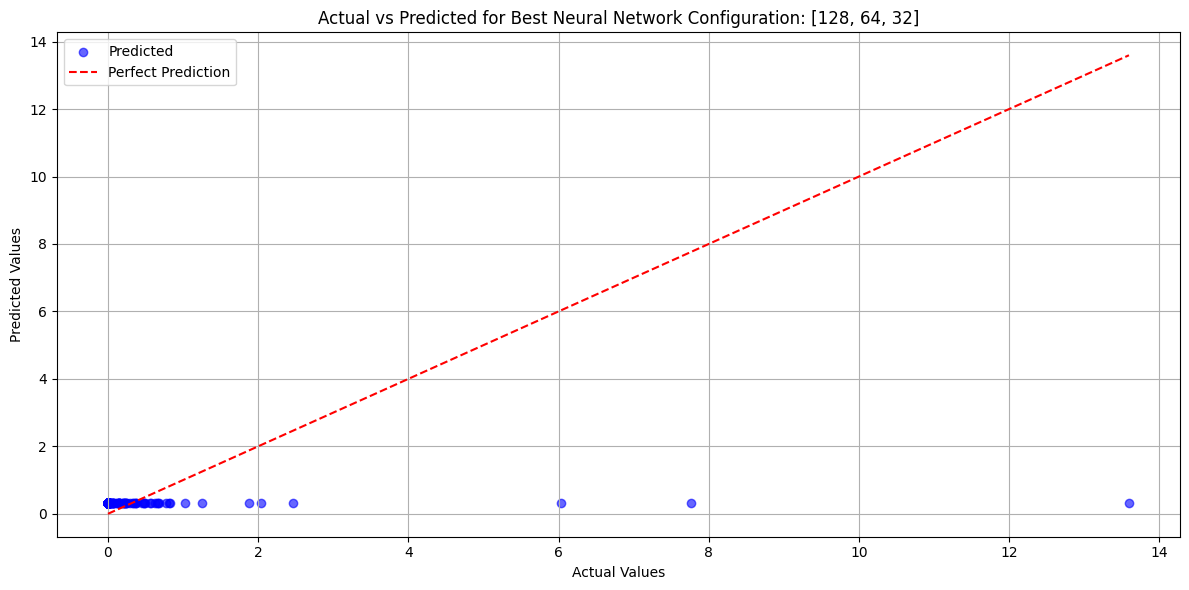

RMSE Results for All Configurations
            Config      RMSE
0     [64, 64, 32]  1.622285
1    [128, 64, 32]  1.622229
2   [128, 128, 64]  1.622255
3   [256, 128, 64]  1.622289
4    [64, 128, 64]  1.622275
5  [128, 128, 128]  1.622250


In [35]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = r"C:\Users\alexm\Downloads\public_emdat_custom_request_2024-02-06_76c28104-4313-4037-8460-6a6bfd8369a1.xlsx"
data = pd.read_excel(file_path)

# Columns with missing values to fill with 0
columns_with_missing_values = [
    "Reconstruction Costs ('000 US$)", "Total Deaths", "Insured Damage ('000 US$)", "Total Damage ('000 US$)",
    "Total Affected", "AID Contribution ('000 US$)", "Total Damage, Adjusted ('000 US$)"
]

# Fill missing values in the specified columns with 0
data[columns_with_missing_values] = data[columns_with_missing_values].fillna(0)

# Define the updated columns to drop
columns_to_drop = [
    'Classification Key', 'Location', 'OFDA Response', 'Appeal', 'End Year', 'End Month', 'End Day',
    'Declaration', 'Historic', 'Disaster Group', 'Disaster Subgroup', 'Last Update', 'Entry Date',
    'Latitude', 'Longitude', 'Admin Units', 'External IDs', 'Event Name', 'Origin',
    'External IDs', 'Magnitude Scale', 'Reconstruction Costs, Adjusted (\'000 US$)',
    'Insured Damage, Adjusted (\'000 US$)', 'DisNo.'
]

# Drop the columns, ignoring errors for non-existent columns
data = data.drop(columns=columns_to_drop, errors='ignore')

# Columns to convert
columns_to_convert = [
    "Reconstruction Costs ('000 US$)", "Insured Damage ('000 US$)", "Total Damage ('000 US$)",
    "Total Damage, Adjusted ('000 US$)"
]

# Convert specified columns to billions
for column in columns_to_convert:
    if column in data.columns:
        data[column] = data[column] / 1e6
        data.rename(columns={column: column.replace("('000 US$)", "(billion $)")}, inplace=True)

# Define target variable and features
target_column = "Total Damage, Adjusted (billion $)"
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Debug: Print column types
print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

# Preprocessing - Scale Numeric and Encode Categorical Data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical features
    ]
)

# Transform features
X_transformed = preprocessor.fit_transform(X)

# Debug: Check transformed X
print("Shape of transformed X:", X_transformed.shape)

# Cross-Validation Setup for Experimentation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
neuron_configs = [
    [64, 64, 32],
    [128, 64, 32],
    [128, 128, 64],
    [256, 128, 64],
    [64, 128, 64],
    [128, 128, 128]
]

best_config = None
best_rmse = float("inf")
config_rmse_results = []

for config in neuron_configs:
    print(f"Testing configuration: {config}")
    cv_rmse_scores = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_transformed)):
        X_train, X_val = X_transformed[train_index], X_transformed[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        print(f"Fold {fold + 1}: Train size {len(train_index)}, Validation size {len(val_index)}")

        # Build and Train Model
        model = keras.Sequential([
            layers.Input(shape=(X_train.shape[1],)),
            layers.Dense(config[0], activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(config[1], activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(config[2], activation='relu'),
            layers.Dense(1)
        ])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Train the model
        model.fit(
            X_train, y_train,
            epochs=100, batch_size=16, verbose=1,
            validation_data=(X_val, y_val), callbacks=[early_stopping]
        )

        # Evaluate the model
        y_val_pred = model.predict(X_val).flatten()
        val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        cv_rmse_scores.append(val_rmse)

        print(f"Fold {fold + 1} RMSE: {val_rmse:.2f}")

    avg_rmse = np.mean(cv_rmse_scores)
    config_rmse_results.append({"Config": config, "RMSE": avg_rmse})

    print(f"Configuration {config} - Average RMSE: {avg_rmse:.2f}")

    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_config = config

print(f"Best Configuration: {best_config} with RMSE: {best_rmse:.2f}")

# Train Final Model with Best Configuration
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(best_config[0], activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(best_config[1], activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(best_config[2], activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=1, callbacks=[early_stopping])

# Evaluate the Final Model
y_pred = model.predict(X_test).flatten()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"Final Model RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# Visualize Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title(f"Actual vs Predicted for Best Neural Network Configuration: {best_config}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Display all configurations and their RMSE scores
config_rmse_results = pd.DataFrame(config_rmse_results)
print("RMSE Results for All Configurations")
print(config_rmse_results)


In [15]:

df = pd.read_excel(r"C:\Users\alexm\Downloads\yearly_sums.xlsx")  
print(df.head)


<bound method NDFrame.head of     Start Year  Total Damage, Adjusted (Billions)  Total Damage (Billions)
0         2000                          29.765781                17.514378
1         2001                           3.225841                 1.951750
2         2002                          37.718174                23.182792
3         2003                          28.988941                18.222002
4         2004                           3.708093                 2.393253
5         2005                          21.982900                14.669420
6         2006                           3.065306                 2.111498
7         2007                          29.872362                21.164206
8         2008                           6.399457                 4.708000
9         2009                          13.967252                10.239000
10        2010                          25.506558                19.004794
11        2011                           1.552160                 1.19

C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



ARIMA(1,0,1) Model Summary:
                                       SARIMAX Results                                       
Dep. Variable:     Total Damage, Adjusted (Billions)   No. Observations:                   24
Model:                                ARIMA(1, 0, 1)   Log Likelihood                 -95.055
Date:                               Tue, 07 Jan 2025   AIC                            198.109
Time:                                       12:22:20   BIC                            202.822
Sample:                                            0   HQIC                           199.360
                                                - 24                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9514      1.192     13.378      0.000      1

C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


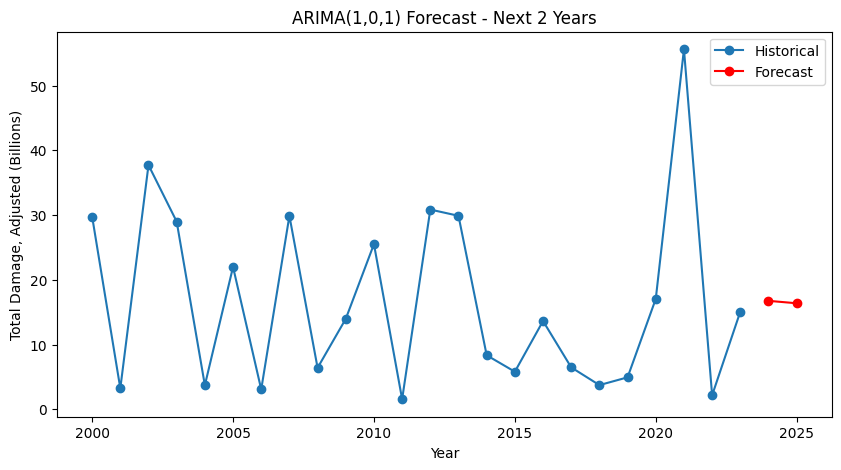

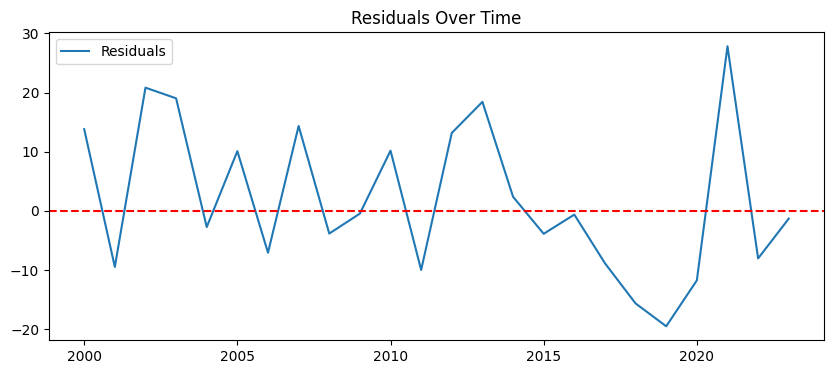

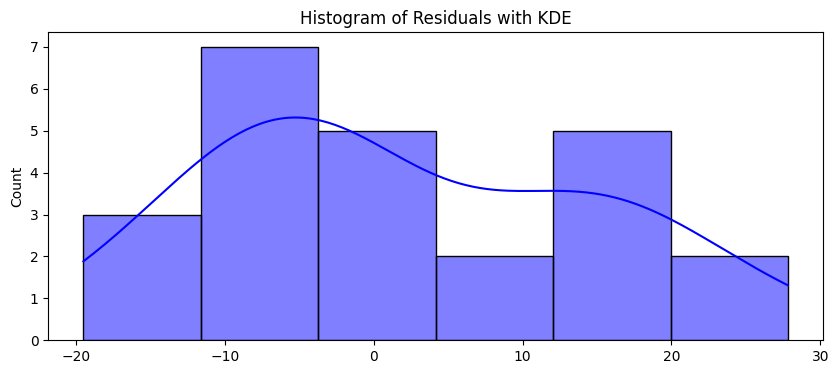

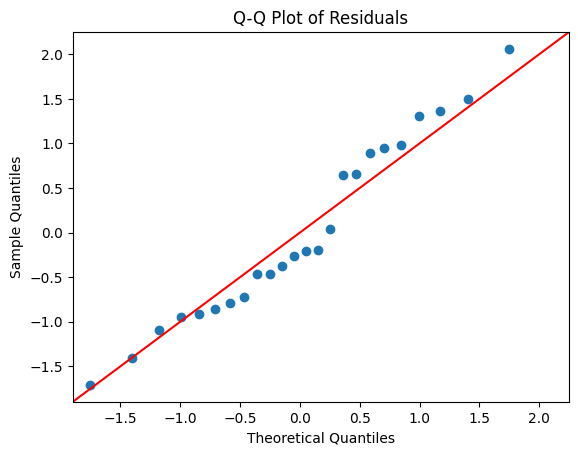

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 20 must be < 12.

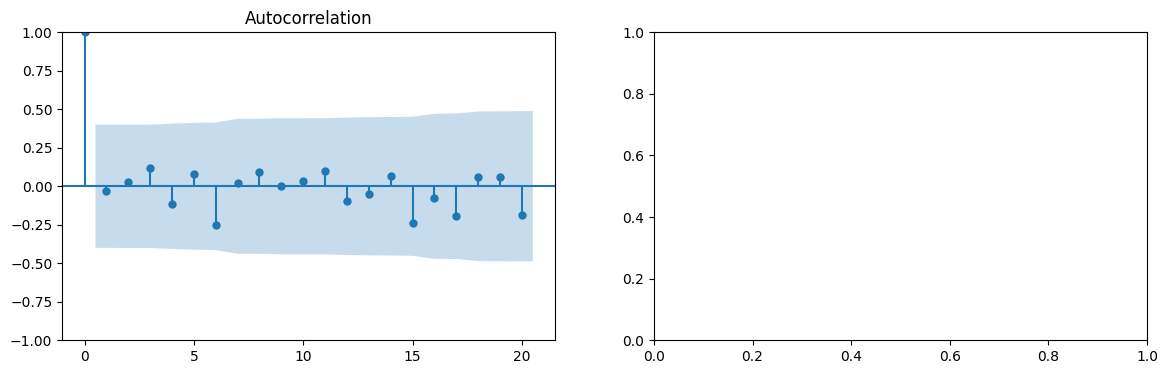

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy.stats import shapiro

# ------------------------------------------------------------------------------
# 1. Load and prepare the data
# ------------------------------------------------------------------------------
file_path = r"C:\Users\alexm\Downloads\yearly_sums.xlsx"
df = pd.read_excel(file_path)

# Sort by Start Year, set as index
df = df.sort_values("Start Year").set_index("Start Year")

# Extract the time series column
# Adjust the column name to match what you have in 'yearly_sums.xlsx'
# Example: "Total Damage, Adjusted (Billions)" or "Total Damage, Adjusted ('000 US$)"
ts = df["Total Damage, Adjusted (Billions)"]  # Change if needed

# ------------------------------------------------------------------------------
# 2. Fit ARIMA(1,0,1)
#    (We assume the series is already stationary, so d=0.)
# ------------------------------------------------------------------------------
model = ARIMA(ts, order=(1, 0, 1))
model_fit = model.fit()
print("\nARIMA(1,0,1) Model Summary:")
print(model_fit.summary())

# ------------------------------------------------------------------------------
# 3. Forecast the next 2 years
# ------------------------------------------------------------------------------
forecast_steps = 2
forecast = model_fit.forecast(steps=forecast_steps)

# Generate a list of forecasted years (assuming integer indexing)
last_year = ts.index[-1]
forecast_years = [last_year + i for i in range(1, forecast_steps + 1)]

# ------------------------------------------------------------------------------
# 4. Plot the historical data + the forecast
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(ts.index, ts, label='Historical', marker='o')
plt.plot(forecast_years, forecast, label='Forecast', marker='o', color='red')

plt.xlabel("Year")
plt.ylabel("Total Damage, Adjusted (Billions)")  # or the appropriate label
plt.title("ARIMA(1,0,1) Forecast - Next 2 Years")
plt.legend()
plt.show()

# ------------------------------------------------------------------------------
# 5. Residual Diagnostics
# ------------------------------------------------------------------------------
residuals = model_fit.resid

## 5A. Time plot of residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Over Time")
plt.legend()
plt.show()

## 5B. Histogram & Kernel Density of residuals
plt.figure(figsize=(10, 4))
sns.histplot(residuals, kde=True, color='blue')
plt.title("Histogram of Residuals with KDE")
plt.show()

## 5C. Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

## 5D. ACF and PACF of residuals
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sm.graphics.tsa.plot_acf(residuals, lags=20, ax=axes[0])
sm.graphics.tsa.plot_pacf(residuals, lags=20, ax=axes[1])
axes[0].set_title("ACF of Residuals")
axes[1].set_title("PACF of Residuals")
plt.show()

## 5E. Shapiro-Wilk Test for normality
stat, p_value = shapiro(residuals.dropna())
print("\nShapiro-Wilk Test:")
print(f"Statistic: {stat}, p-value: {p_value}")
if p_value < 0.05:
    print("=> Residuals may not be normally distributed (reject H0).")
else:
    print("=> Residuals likely normal (fail to reject H0).")



C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



=== ARIMA(1,0,1) Model Summary ===
                                       SARIMAX Results                                       
Dep. Variable:     Total Damage, Adjusted (Billions)   No. Observations:                   24
Model:                                ARIMA(1, 0, 1)   Log Likelihood                 -95.055
Date:                               Tue, 07 Jan 2025   AIC                            198.109
Time:                                       12:25:06   BIC                            202.822
Sample:                                            0   HQIC                           199.360
                                                - 24                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9514      1.192     13.378      0.000

C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


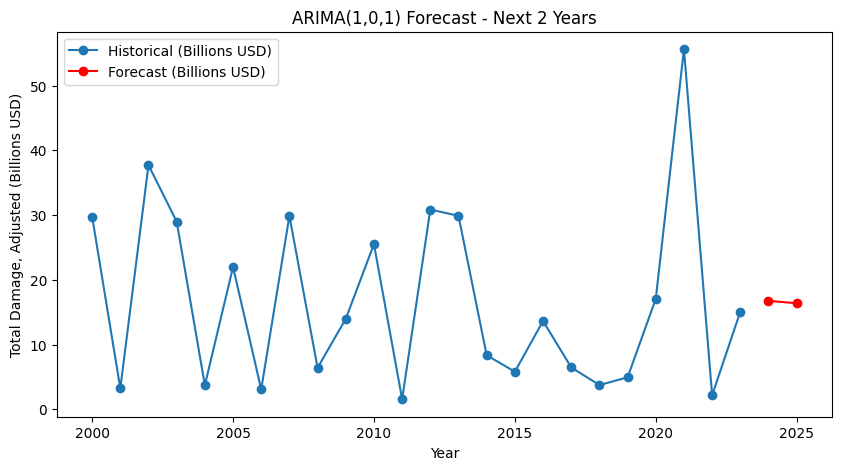

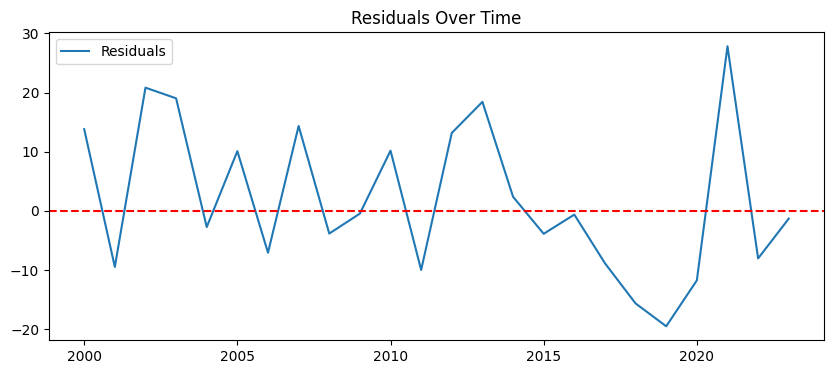

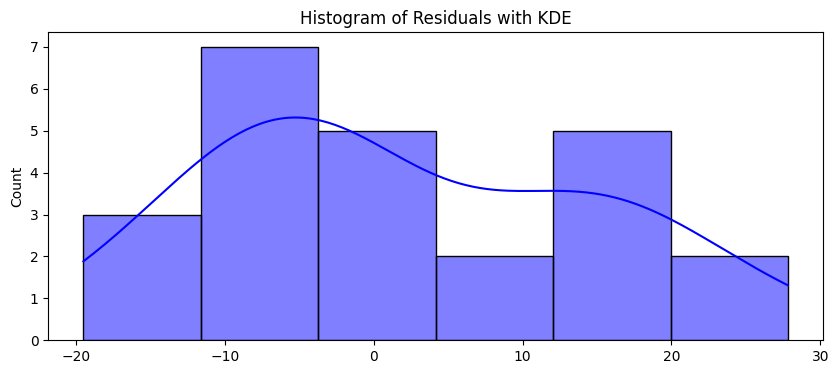

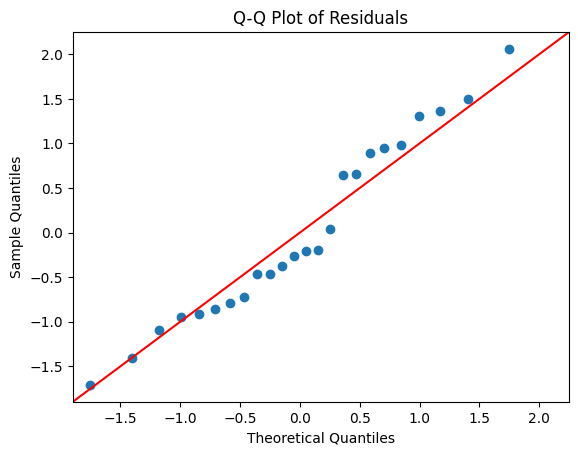

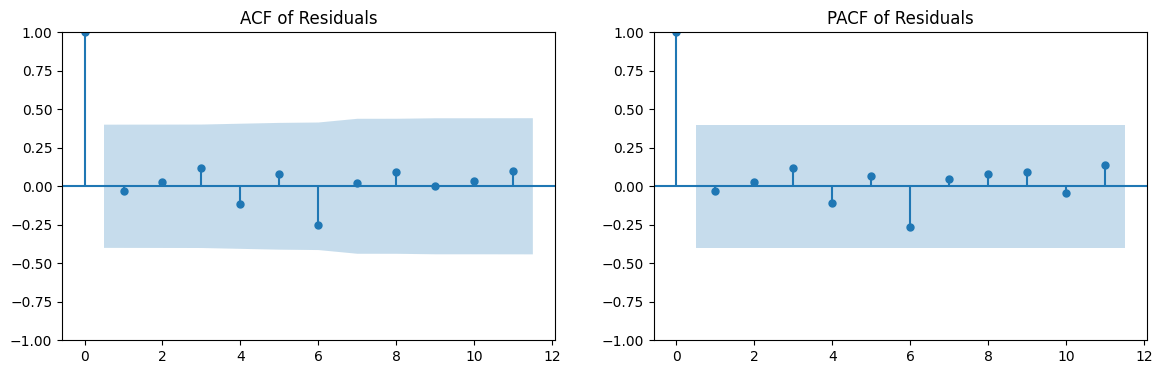


=== Shapiro-Wilk Test ===
Statistic: 0.9546295120184806, p-value: 0.3402276280133697
=> Residuals likely normal (fail to reject H0).


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from scipy.stats import shapiro

# ------------------------------------------------------------------------------
# 1. Load and prepare the data
# ------------------------------------------------------------------------------
file_path = r"C:\Users\alexm\Downloads\yearly_sums.xlsx"
df = pd.read_excel(file_path)

# Sort by Start Year, set as index
df = df.sort_values("Start Year").set_index("Start Year")

# Extract the time series column
# Make sure this matches the column in your Excel file
ts = df["Total Damage, Adjusted (Billions)"]

# ------------------------------------------------------------------------------
# 2. Fit ARIMA(1,0,1)
#    (We assume the series is already stationary, so d=0.)
# ------------------------------------------------------------------------------
model = ARIMA(ts, order=(1, 0, 1))
model_fit = model.fit()
print("\n=== ARIMA(1,0,1) Model Summary ===")
print(model_fit.summary())

# ------------------------------------------------------------------------------
# 3. Forecast the next 2 years
# ------------------------------------------------------------------------------
forecast_steps = 2
forecast = model_fit.forecast(steps=forecast_steps)

# Generate forecast years (assuming integer indexing)
last_year = ts.index[-1]
forecast_years = [last_year + i for i in range(1, forecast_steps + 1)]

# ------------------------------------------------------------------------------
# 4. Plot the historical data + the forecast
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(ts.index, ts, label='Historical (Billions USD)', marker='o')
plt.plot(forecast_years, forecast, label='Forecast (Billions USD)', marker='o', color='red')

plt.xlabel("Year")
plt.ylabel("Total Damage, Adjusted (Billions USD)")
plt.title("ARIMA(1,0,1) Forecast - Next 2 Years")
plt.legend()
plt.show()

# ------------------------------------------------------------------------------
# 5. Residual Diagnostics
# ------------------------------------------------------------------------------
residuals = model_fit.resid

## 5A. Plot residuals over time
plt.figure(figsize=(10, 4))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Over Time")
plt.legend()
plt.show()

## 5B. Histogram & Kernel Density of residuals
plt.figure(figsize=(10, 4))
sns.histplot(residuals, kde=True, color='blue')
plt.title("Histogram of Residuals with KDE")
plt.show()

## 5C. Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

## 5D. ACF and PACF of residuals (with dynamic lag calculation)
n = len(residuals)
max_lags = n // 2 - 1
# Ensure max_lags >= 1 to avoid errors
if max_lags < 1:
    max_lags = 1

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sm.graphics.tsa.plot_acf(residuals, lags=max_lags, ax=axes[0])
sm.graphics.tsa.plot_pacf(residuals, lags=max_lags, ax=axes[1])
axes[0].set_title("ACF of Residuals")
axes[1].set_title("PACF of Residuals")
plt.show()

## 5E. Shapiro-Wilk Test for normality
stat, p_value = shapiro(residuals.dropna())
print("\n=== Shapiro-Wilk Test ===")
print(f"Statistic: {stat}, p-value: {p_value}")
if p_value < 0.05:
    print("=> Residuals may not be normally distributed (reject H0).")
else:
    print("=> Residuals likely normal (fail to reject H0).")


In [21]:
#Given your Shapiro-Wilk test results:

#Statistic: 0.9546
#p-value: 0.3402
#, you fail to reject the null hypothesis (H00 of the Shapiro-Wilk test—which states that “the sample is drawn from a normal distribution.” In simpler terms:
#Residuals likely normal (fail to reject H00​ )

#Interpreting the Outcome
#Residuals Are Approximately Normal
#This is a good sign for your ARIMA model. Normally distributed residuals indicate that your model’s errors are centered around zero and do not exhibit heavy skew or outliers.

#Other Diagnostics

#ACF/PACF of residuals: Ensure there is no significant autocorrelation remaining.
#Residuals vs. Time Plot: Should appear random, without obvious patterns.
#Implications

#A well-behaved residual series (i.e., approximately normal and uncorrelated) suggests that the ARIMA(1,0,1) model is adequately capturing the underlying structure in the data.
#You can gain additional confidence in the model by looking at out-of-sample forecast accuracy if you have enough data to do a train/test split.
#Overall, these results imply your model’s residuals behave like white noise, which is what we want in time-series modeling.


=== ADF Test on Original Series ===
ADF Statistic:  -15.725263105291402
p-value:  1.309139696161588e-28
Critical Values:
   1%, -3.4558530692911504
Critical Values:
   5%, -2.872764881778665
Critical Values:
   10%, -2.572751643088207
=> Stationary (reject H0: unit root present)



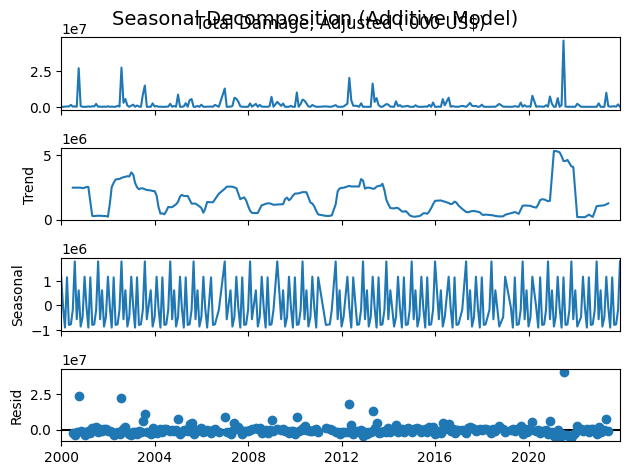


=== SARIMAX Model Summary ===
                                       SARIMAX Results                                       
Dep. Variable:     Total Damage, Adjusted ('000 US$)   No. Observations:                  288
Model:                SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -4105.976
Date:                               Tue, 07 Jan 2025   AIC                           8221.951
Time:                                       13:15:32   BIC                           8240.017
Sample:                                   01-01-2000   HQIC                          8229.203
                                        - 12-01-2023                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0011      0.004    225.786      0.000     

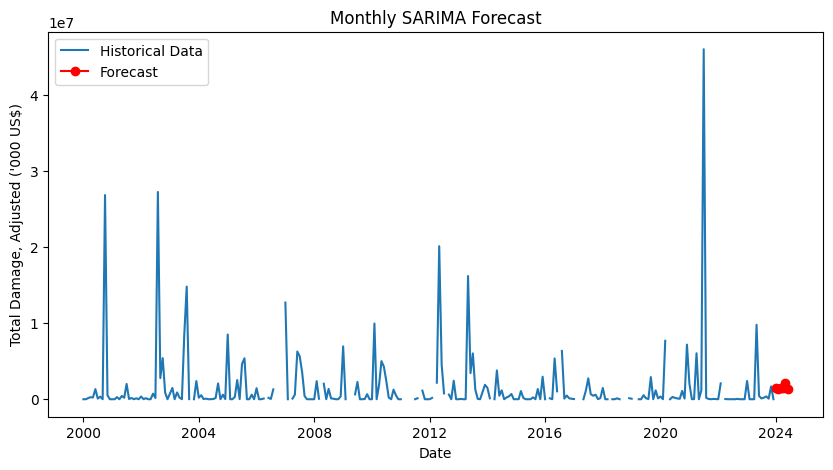

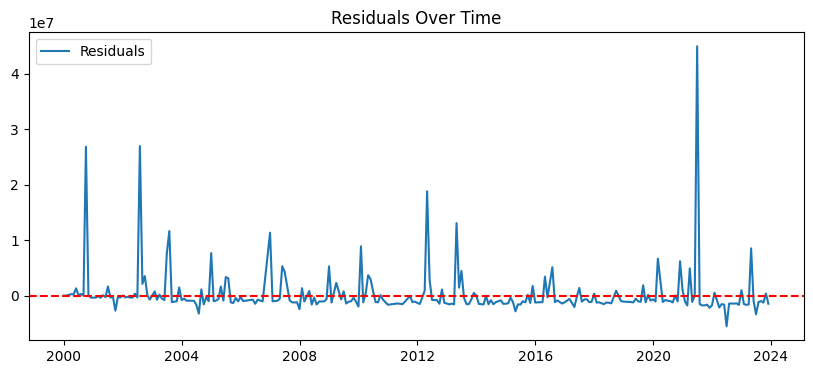

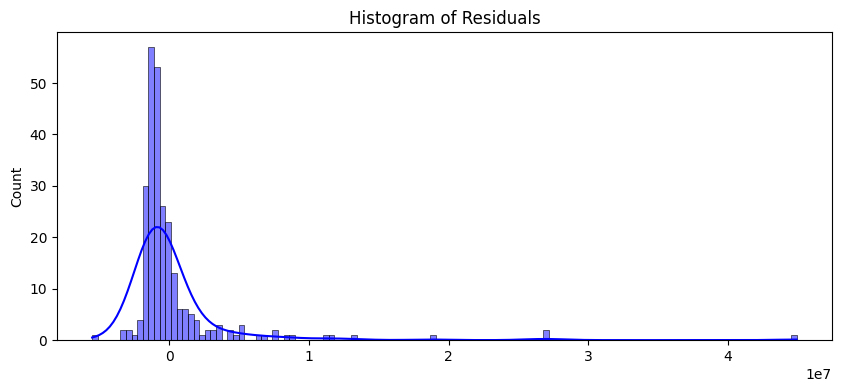

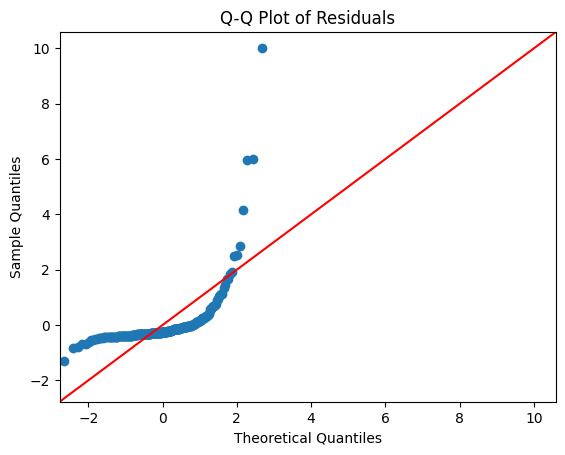

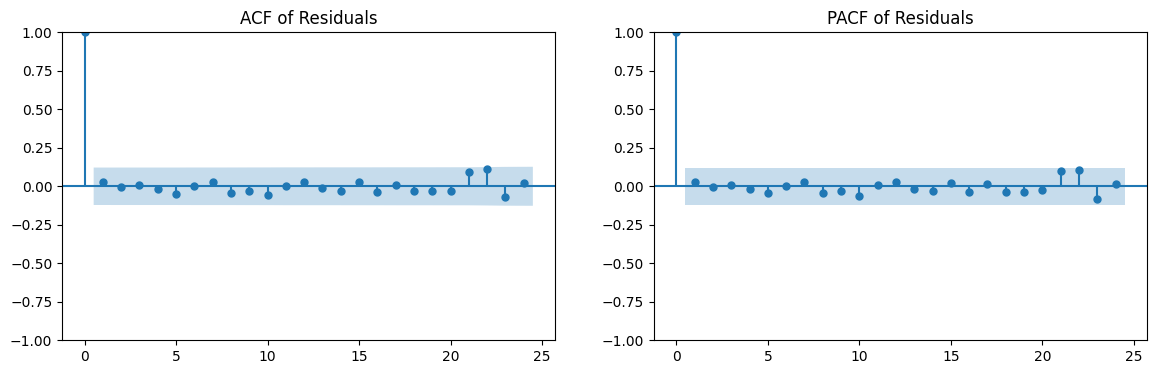


=== Shapiro-Wilk Test (Residuals) ===
Test Statistic: 0.42280449337830617
p-value: 4.511683815405095e-28
=> Residuals may not be normally distributed (reject H0).


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from scipy.stats import shapiro

# ------------------------------------------------------------------------------
# 1. Load Monthly Data
# ------------------------------------------------------------------------------
# Example: After you generated 'monthly_sums.xlsx' with the columns:
#  "Start Year", "Start Month", "Total Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)"
file_path = r"C:\Users\alexm\Downloads\monthly_sums.xlsx"
df = pd.read_excel(file_path)

# Ensure the DataFrame has these columns:
# ['Start Year', 'Start Month', 'Total Damage, Adjusted ('000 US$)', 'Total Damage ('000 US$)']

# 1A. Create a 'Date' column from Year and Month (assuming Day=1)
df['Date'] = pd.to_datetime({
    'year': df['Start Year'],
    'month': df['Start Month'],
    'day': 1
})

# 1B. Sort by Date and set as the DataFrame index
df = df.sort_values('Date').set_index('Date')

# ------------------------------------------------------------------------------
# 2. Extract the Time Series
# ------------------------------------------------------------------------------
# Here we choose "Total Damage, Adjusted ('000 US$)" as our target variable.
ts = df["Total Damage, Adjusted ('000 US$)"]

# (Optional) Ensure monthly frequency if missing:
ts = ts.asfreq('MS')  # 'MS' = Month Start

# ------------------------------------------------------------------------------
# 3. Check Stationarity: Augmented Dickey-Fuller (ADF) Test
# ------------------------------------------------------------------------------
def check_stationarity(series):
    """Perform ADF Test to check stationarity of the given time series."""
    result = adfuller(series.dropna(), autolag='AIC')
    print("ADF Statistic: ", result[0])
    print("p-value: ", result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')
    if result[1] < 0.05:
        print("=> Stationary (reject H0: unit root present)")
    else:
        print("=> Not stationary (fail to reject H0)")
    print("")

print("\n=== ADF Test on Original Series ===")
check_stationarity(ts)

# ------------------------------------------------------------------------------
# 4. Check for Seasonality (Optional, but recommended)
#    We can do a seasonal decomposition to visually inspect trends/seasonalities.
# ------------------------------------------------------------------------------
result = seasonal_decompose(ts.dropna(), model='additive', period=12)  # 12 for monthly data
result.plot()
plt.suptitle("Seasonal Decomposition (Additive Model)", fontsize=14)
plt.show()

# ------------------------------------------------------------------------------
# 5. Build & Fit a Seasonal ARIMA (SARIMAX)
#    - If the ADF test shows stationarity, you may set d=0 (and perhaps D=0).
#    - If you see strong seasonal patterns, consider setting seasonal_order=(P,D,Q,12).
#    - If minimal seasonality is detected, you can do a standard ARIMA.
# ------------------------------------------------------------------------------
# Example: We'll do a SARIMAX with p=1, d=0, q=1, seasonal_order=(1,0,1,12)
# You can adjust based on your data or use auto_arima from pmdarima.

# If your data is already stationary and shows strong 12-month seasonality, 
# you might try something like (p,d,q)=(1,0,1) with seasonal=(1,0,1,12).

model = SARIMAX(ts, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)
print("\n=== SARIMAX Model Summary ===")
print(model_fit.summary())

# ------------------------------------------------------------------------------
# 6. Forecast (e.g., next 6 months)
# ------------------------------------------------------------------------------
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)
# forecast will have a DatetimeIndex continuing monthly after the last known date

# ------------------------------------------------------------------------------
# 7. Plot Historical + Forecast
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 5))

# Plot historical data
plt.plot(ts.index, ts, label='Historical Data')

# Plot forecast
plt.plot(forecast.index, forecast, label='Forecast', color='red', marker='o')

plt.title("Monthly SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Total Damage, Adjusted ('000 US$)")
plt.legend()
plt.show()

# ------------------------------------------------------------------------------
# 8. Residual Diagnostics
# ------------------------------------------------------------------------------
residuals = model_fit.resid.dropna()

## 8A. Plot residuals over time
plt.figure(figsize=(10, 4))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Over Time")
plt.legend()
plt.show()

## 8B. Histogram & Kernel Density
plt.figure(figsize=(10, 4))
sns.histplot(residuals, kde=True, color='blue')
plt.title("Histogram of Residuals")
plt.show()

## 8C. Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

## 8D. ACF/PACF
# Be mindful if you have very few data points, reduce the lags
n = len(residuals)
max_lags = min(24, n//2 - 1)  # e.g., up to 24 or half the data
if max_lags < 1:
    max_lags = 1

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sm.graphics.tsa.plot_acf(residuals, lags=max_lags, ax=axes[0])
sm.graphics.tsa.plot_pacf(residuals, lags=max_lags, ax=axes[1])
axes[0].set_title("ACF of Residuals")
axes[1].set_title("PACF of Residuals")
plt.show()

## 8E. Shapiro-Wilk Test (Normality)
stat, p_value = shapiro(residuals)
print("\n=== Shapiro-Wilk Test (Residuals) ===")
print(f"Test Statistic: {stat}")
print(f"p-value: {p_value}")
if p_value < 0.05:
    print("=> Residuals may not be normally distributed (reject H0).")
else:
    print("=> Residuals likely normal (fail to reject H0).")



=== ADF Test on Log(x+1) Series ===
ADF Statistic: -15.100948203440861
p-value: 7.942203811105269e-28
   Critical Value 1%: -3.4558530692911504
   Critical Value 5%: -2.872764881778665
   Critical Value 10%: -2.572751643088207
=> Stationary (reject H0: unit root present)



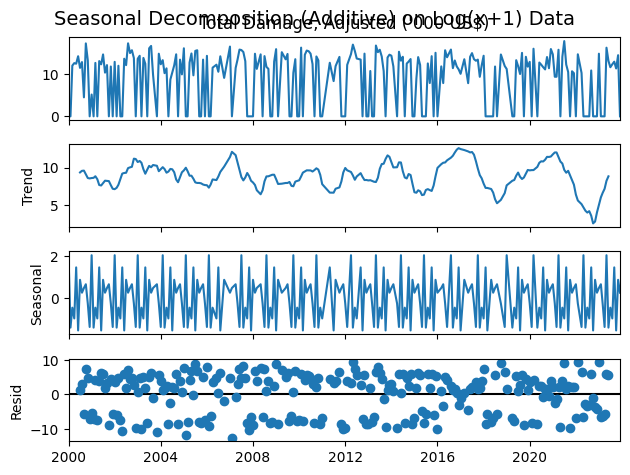

C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



=== SARIMAX Model Summary (Log+1) ===
                                       SARIMAX Results                                       
Dep. Variable:     Total Damage, Adjusted ('000 US$)   No. Observations:                  260
Model:                SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -816.421
Date:                               Tue, 07 Jan 2025   AIC                           1642.843
Time:                                       13:39:31   BIC                           1660.369
Sample:                                            0   HQIC                          1649.900
                                               - 260                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1107      0.637      0.174      0.

C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\alexm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


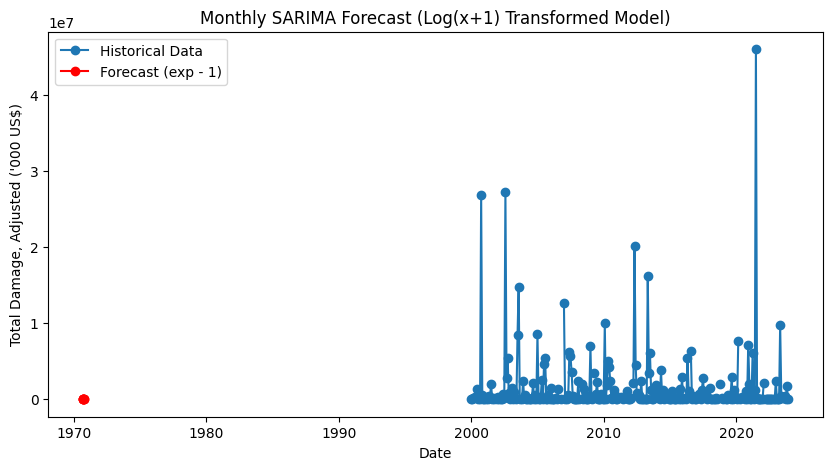

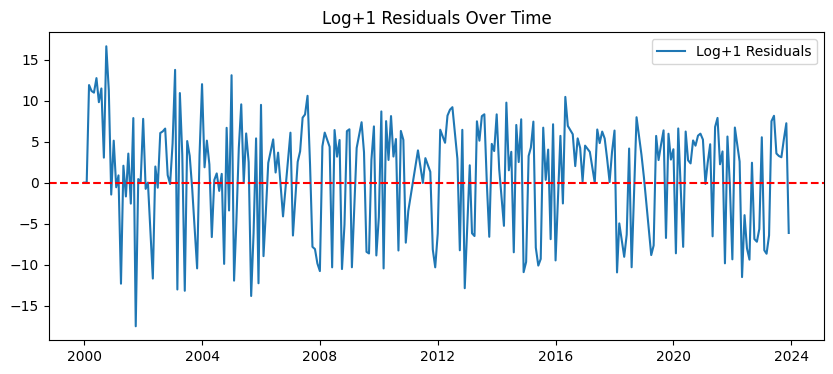

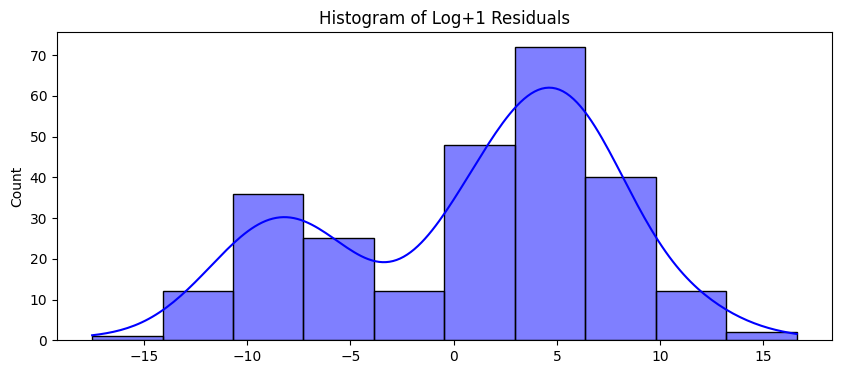

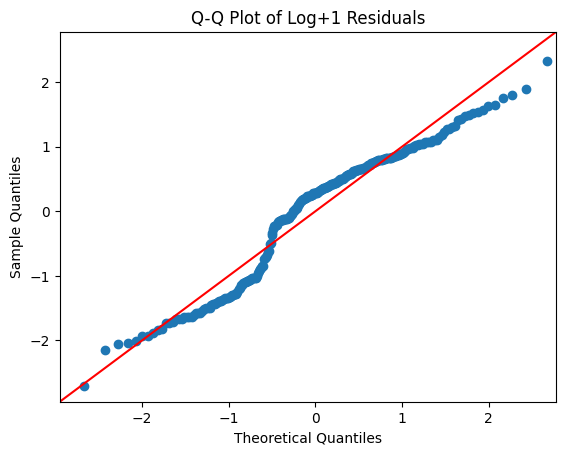

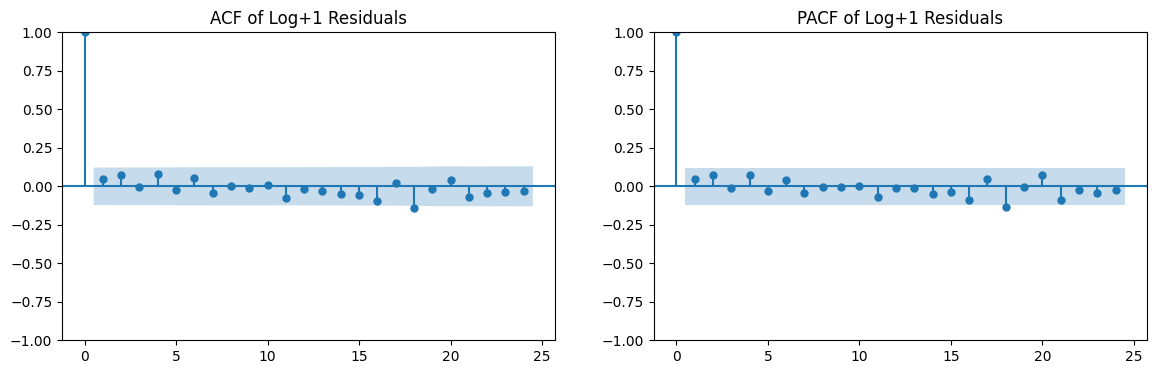


=== Shapiro-Wilk Test (Log+1 Residuals) ===
Test Statistic: 0.9431834558694794
p-value: 1.714890032416205e-08
=> Residuals may not be normally distributed (reject H0).


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from scipy.stats import shapiro

# ------------------------------------------------------------------------------
# 1. Load Monthly Data
# ------------------------------------------------------------------------------
file_path = r"C:\Users\alexm\Downloads\monthly_sums.xlsx"
df = pd.read_excel(file_path)

# DataFrame columns:
#   "Start Year", "Start Month", "Total Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)"

# 1A. Create a 'Date' column (Day=1) and set as index
df['Date'] = pd.to_datetime({
    'year': df['Start Year'],
    'month': df['Start Month'],
    'day': 1
})
df = df.sort_values('Date').set_index('Date')

# ------------------------------------------------------------------------------
# 2. Extract the Time Series & Apply log( x + 1 ) Transformation
#    This helps avoid log(0) if any zeros or extremely small values are present.
# ------------------------------------------------------------------------------
ts = df["Total Damage, Adjusted ('000 US$)"].asfreq('MS')  # monthly freq

# Add 1 to avoid log(0). If your data can have large zeros, consider a bigger offset (e.g., +0.1, +1, etc.).
ts_plus_one = ts + 1

# Drop negative or invalid entries if any exist
ts_plus_one[ts_plus_one <= 0] = np.nan
ts_plus_one = ts_plus_one.dropna()

# Now take the log
ts_log = np.log(ts_plus_one).dropna()

# ------------------------------------------------------------------------------
# 3. Check Stationarity on the Log( x + 1 ) Series
# ------------------------------------------------------------------------------
def check_stationarity(series):
    """Perform ADF Test on the given time series."""
    result = adfuller(series.dropna(), autolag='AIC')
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    for key, value in result[4].items():
        print(f"   Critical Value {key}: {value}")
    if result[1] < 0.05:
        print("=> Stationary (reject H0: unit root present)")
    else:
        print("=> Not stationary (fail to reject H0)")
    print("")

print("\n=== ADF Test on Log(x+1) Series ===")
check_stationarity(ts_log)

# ------------------------------------------------------------------------------
# 4. Optional: Seasonal Decomposition on Log Scale
# ------------------------------------------------------------------------------
result = seasonal_decompose(ts_log.dropna(), model='additive', period=12)
result.plot()
plt.suptitle("Seasonal Decomposition (Additive) on Log(x+1) Data", fontsize=14)
plt.show()

# ------------------------------------------------------------------------------
# 5. Fit a Seasonal ARIMA (SARIMAX) on the log-transformed series
#    Example: order=(1,0,1), seasonal_order=(1,0,1,12)
# ------------------------------------------------------------------------------
model = SARIMAX(
    ts_log,
    order=(1, 0, 1),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
model_fit = model.fit(disp=False)
print("\n=== SARIMAX Model Summary (Log+1) ===")
print(model_fit.summary())

# ------------------------------------------------------------------------------
# 6. Forecast (e.g., next 6 months)
# ------------------------------------------------------------------------------
forecast_steps = 6
log_forecast = model_fit.forecast(steps=forecast_steps)  # forecast in log+1 space

# Convert back to original scale: exp(...) - 1
forecast_exp = np.exp(log_forecast) - 1

# ------------------------------------------------------------------------------
# 7. Plot Historical + Forecast
# ------------------------------------------------------------------------------
plt.figure(figsize=(10, 5))

# Plot original data (ts) — some zero values might exist, so we clamp them
ts_clamped = ts.clip(lower=0)  # in case you had negative/invalid
plt.plot(ts_clamped.index, ts_clamped, label='Historical Data', marker='o')

# Plot forecast in original scale
plt.plot(forecast_exp.index, forecast_exp, label='Forecast (exp - 1)', 
         color='red', marker='o')

plt.title("Monthly SARIMA Forecast (Log(x+1) Transformed Model)")
plt.xlabel("Date")
plt.ylabel("Total Damage, Adjusted ('000 US$)")
plt.legend()
plt.show()

# ------------------------------------------------------------------------------
# 8. Residual Diagnostics (on log+1 residuals)
# ------------------------------------------------------------------------------
residuals = model_fit.resid.dropna()

## 8A. Plot residuals over time
plt.figure(figsize=(10, 4))
plt.plot(residuals, label='Log+1 Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title("Log+1 Residuals Over Time")
plt.legend()
plt.show()

## 8B. Histogram & Kernel Density
plt.figure(figsize=(10, 4))
sns.histplot(residuals, kde=True, color='blue')
plt.title("Histogram of Log+1 Residuals")
plt.show()

## 8C. Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Log+1 Residuals")
plt.show()

## 8D. ACF/PACF
n = len(residuals)
max_lags = min(24, n // 2 - 1)
if max_lags < 1:
    max_lags = 1

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sm.graphics.tsa.plot_acf(residuals, lags=max_lags, ax=axes[0])
sm.graphics.tsa.plot_pacf(residuals, lags=max_lags, ax=axes[1])
axes[0].set_title("ACF of Log+1 Residuals")
axes[1].set_title("PACF of Log+1 Residuals")
plt.show()

## 8E. Shapiro-Wilk Test (Normality)
stat, p_value = shapiro(residuals)
print("\n=== Shapiro-Wilk Test (Log+1 Residuals) ===")
print(f"Test Statistic: {stat}")
print(f"p-value: {p_value}")
if p_value < 0.05:
    print("=> Residuals may not be normally distributed (reject H0).")
else:
    print("=> Residuals likely normal (fail to reject H0).")
